# Daily Template
* 태현씨가 전달한 버전으로 그래프 수정

* fixed facebook data

In [1]:
import os
import nltk
import datetime
import numpy as np

import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from konlpy.tag import Twitter

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [3]:
date_week = "2022-01-22"

In [4]:
data_path = "../sns_data/{}".format(date_week)
os.mkdir(data_path)

FileExistsError: [Errno 17] File exists: '../sns_data/2022-01-22'

In [11]:
plot_path = "../weekly_plots/{}".format(date_week)
os.mkdir(plot_path)

FileExistsError: [Errno 17] File exists: '../weekly_plots/2021-01-14'

In [14]:
fnames = ['youtube', 'facebook', 'article','datalab']
for f in fnames:
    os.mkdir(os.path.join(data_path, f))

In [84]:
# Change file name


In [5]:
font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [6]:
## artificial data
#instagram_follower = 1507
instagram_follower = 4493
youtube_subscribers = 6540
facebook_follower = 720

In [7]:

# df_yt_subscription = pd.read_csv("../sns_data/2021-10-13/youtube/subscription_data.csv")
# df_yt_gender_age = pd.read_csv("../sns_data/2021-10-13/youtube/gender_age_data.csv")
#df_yt_video_data = pd.read_csv("../sns_data/{}/youtube/Chart data.csv".format(date_week))
df_yt_table_data = pd.read_csv("../sns_data/{}/youtube/Table data.csv".format(date_week))
df_yt_subscription_data = pd.read_csv("../sns_data/{}/youtube/Totals.csv".format(date_week))

# df_fb_contents = pd.read_csv("../sns_data/2021-10-13/facebook/contents.csv")
#df_fb_results = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_results.csv")
# df_fb_targets = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_targets.csv")
df_fb_insights = pd.read_csv("../sns_data/{}/facebook/facebook_insights.csv".format(date_week))


df_article = pd.read_csv("../sns_data/{}/article/article.csv".format(date_week))
df_article['pubDate'] =  pd.to_datetime(df_article['pubDate'])

df_datalab = pd.read_csv("../sns_data/{}/datalab/datalab.csv".format(date_week))
df_datalab= df_datalab.iloc[6:]
df_datalab.columns = ["Date", "버즈량"]

In [8]:
fb_follower = df_fb_insights[["날짜", "좋아요"]]

fb_follower = fb_follower.drop(0)
fb_follower.columns = ["Date" , "Counts"]
fb_follower["Date"] = pd.to_datetime(fb_follower["Date"])


# Select dates in between

# fb_follower = fb_follower.loc[(fb_follower['Date'] > start_date) & (fb_follower["Date"] < end_date) \
#                   | (fb_follower['Date'] == start_date) | (fb_follower["Date"] == end_date)]

fb_follower['sns_type'] = "Facebook"

In [9]:
fb_follower = fb_follower.fillna(0)

In [10]:
df_yt_table_data.head()

,Video,Video title,Video publish time,Subscribers,Views,Watch time (hours),Average view duration,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,395.0,65682.0,1302.5553,0:01:11,218560,5.69
1,FKptcSIm5rQ,"김동연, 문재인정부 항명파동 “지금 대통령에게 항명합니까?”","Jan 9, 2022",48.0,4666.0,197.7727,0:02:32,16737,13.40
2,4bsHlVdU2MU,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),"Oct 25, 2021",31.0,32413.0,334.7530,0:00:37,2062,3.15
3,A5qry2kYZDA,"김동연캠프 긴급기자회견, “국민께 드리는 김동연의 지부상소”","Jan 21, 2022",11.0,2036.0,184.5594,0:05:26,9352,10.28
4,L68pJuZlWqM,"김동연 대통령후보, “대한민국, 중소기업 중심체제로의 전환” - 중소기업중앙회 신년사","Jan 6, 2022",10.0,682.0,12.8156,0:01:07,9100,4.80


## 구독자 수 그래프
* 유투브 데이터 구독자로 바꾸기
* 페이스북 페이지 정보 가져오기

In [11]:
start_date = datetime.datetime(2022, 1, 7)
end_date = datetime.datetime(2022, 1, 22)

In [12]:
## View time series graph

colnames = ["Date", "Counts",]

# Youtube
df_yt_subscription_data.columns = colnames
df_yt_subscription_data['Date'] = pd.to_datetime(df_yt_subscription_data['Date'])
yt_follower = df_yt_subscription_data.copy()
yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
              | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]


start_sub = youtube_subscribers -  yt_follower['Counts'].sum()
yt_follower['Counts'] = yt_follower['Counts'].cumsum() + start_sub
# df_temp = df_yt_table_data[["Video title", "Subscribers", "Video publish time"]]
# total_subscribers = df_temp["Subscribers"].loc[0]

# df_temp.dropna(inplace=True)
# df_temp["Video publish time"] = pd.to_datetime(df_temp["Video publish time"])
# df_temp.sort_values("Video publish time", inplace=True)
# grs = df_temp.groupby("Video publish time")

# yt_follower = grs.sum()
# yt_follower.reset_index(inplace=True)

# newcomer_sum = yt_follower['Subscribers'].sum()
# start_sum = total_subscribers - newcomer_sum
# yt_follower['Subscribers'] =  yt_follower['Subscribers'].cumsum() + start_sum
# yt_follower.columns = colnames
# yt_follower['sns_type'] = "Youtube"

# yt_follower['Date'] = pd.to_datetime(yt_follower['Date'])
# yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
#               | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]
    
# df_yt_subscription_data.columns = colnames
# df_yt_subscription_data['Date'] = pd.to_datetime(df_yt_subscription_data['Date'])
# yt_follower = df_yt_subscription_data.copy()
# yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
#               | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]
    
    
    
# Facebook
# columns = df_fb_results.iloc[1]
# df_plot = df_fb_results.iloc[-7:] # 날짜 때문에 임의로
# df_plot.columns = columns



# temp_list = []
# for record in df_plot.iterrows():
#     date = record[1]['날짜'][:10]
#     view = int(record[1]['Facebook 페이지 도달'])
#     temp_list.append({"Date": date, "Counts": view})
    
# fb_follower = pd.DataFrame(temp_list)
# fb_follower['sns_type'] = "Facebook"




# Select dates in between
fb_follower = fb_follower.loc[(fb_follower['Date'] > start_date) & (fb_follower["Date"] < end_date) \
                  | (fb_follower['Date'] == start_date) | (fb_follower["Date"] == end_date)]

fb_follower['sns_type'] = "Facebook"
fb_follower = fb_follower.fillna(0)
fb_follower['Counts'] = fb_follower["Counts"].map(int)

total_sum = fb_follower['Counts'].sum()
facebook_follower_start = facebook_follower - total_sum
fb_follower['Counts'] = fb_follower['Counts'].cumsum() + facebook_follower_start


# Facebook page


# Article
art_views = df_article[["title", "pubDate"]]
grs = art_views.groupby("pubDate")
art_follower = grs.count()
art_follower.reset_index(inplace=True)
art_follower.columns = ["Date", "Counts"]


# Instagram Followers
date = fb_follower['Date'].tolist()
insta_follower = pd.DataFrame({"Date" : date})
#counts = [1518] * 4 + [1889] * 3 + [instagram_follower]  # Temp
num_records = insta_follower.shape[0]
counts = np.linspace(3231 ,instagram_follower ,num_records)
insta_follower["Counts"] = counts
insta_follower['sns_type'] = "Instagram"

In [13]:
# # Change Date
dfs = [fb_follower, insta_follower, art_follower, yt_follower]
for df in dfs:
    df['Date'] = df['Date'].apply(lambda x : x.strftime("%m-%d"))

    


In [14]:
yt_follower["Date"].head(1).item()

'01-07'

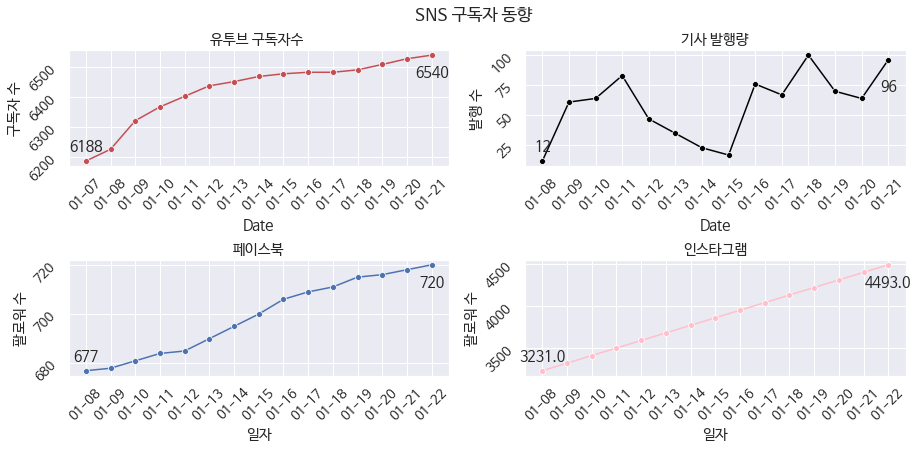

In [15]:
fig, axes = plt.subplots(2,2, figsize=(15,6))
fig.suptitle("SNS 구독자 동향")
plt.subplots_adjust(hspace=0.8)
sns.lineplot(ax=axes[0,0] ,x="Date", y="Counts", color='r', data=yt_follower, marker="o")
axes[0,0].set_title("유투브 구독자수 ")
axes[0,0].set_ylabel("구독자 수")

start_x, start_y = yt_follower["Date"].head(1).item(), yt_follower["Counts"].head(1).item()
end_x, end_y = yt_follower["Date"].tail(1).item(), yt_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[0,0].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[0,0].text(end_x, end_y - length * 0.2, str(end_y), ha="center")
axes[0,0].tick_params(labelrotation=45)


sns.lineplot(ax=axes[0,1] ,x="Date", y="Counts", color='black', data=art_follower, marker="o")
axes[0,1].set_title("기사 발행량")
axes[0,1].set_ylabel("발행 수")
start_x, start_y = art_follower["Date"].head(1).item(), art_follower["Counts"].head(1).item()
end_x, end_y = art_follower["Date"].tail(1).item(), art_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[0,1].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[0,1].text(end_x, end_y  - length * 0.3, str(end_y), ha="center")
axes[0,1].tick_params(labelrotation=45)




sns.lineplot(ax=axes[1,0] ,x="Date", y="Counts", data=fb_follower, marker="o")
axes[1,0].set_title("페이스북")
axes[1,0].set_xlabel("일자")
axes[1,0].set_ylabel("팔로워 수")
start_x, start_y = fb_follower["Date"].head(1).item(), fb_follower["Counts"].head(1).item()
end_x, end_y = fb_follower["Date"].tail(1).item(), fb_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[1,0].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[1,0].text(end_x, end_y - length * 0.2, str(end_y), ha="center")
axes[1,0].tick_params(labelrotation=45)



sns.lineplot(ax=axes[1,1] ,x="Date", y="Counts", color='pink',
             data=insta_follower, marker="o")
axes[1,1].set_title("인스타그램")
axes[1,1].set_xlabel("일자")
axes[1,1].set_ylabel("팔로워 수")
start_x, start_y = insta_follower["Date"].head(1).item(), insta_follower["Counts"].head(1).item()
end_x, end_y = insta_follower["Date"].tail(1).item(), insta_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[1,1].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[1,1].text(end_x, end_y - length * 0.2, str(end_y), ha="center")
axes[1,1].tick_params(labelrotation=45)


plt.savefig("../weekly_plots/{}/sns_overall.png".format(date_week), transparent=True)

## Youtube 조회수 그래프

In [15]:
df_yt_chart_data = pd.read_csv("../sns_data/{}/youtube/Chart data.csv".format(date_week))
df_yt_chart_data =  df_yt_chart_data.dropna()
df_yt_chart_data['Video publish time'] = pd.to_datetime(df_yt_table_data['Video publish time'])
df_yt_chart_data.head()

chart_df = df_yt_chart_data[["Date", "Video title", "Video publish time", "Views"]]


In [16]:
chart_df.head()

,Date,Video title,Video publish time,Views
0,2022-01-07,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),NaT,18206
1,2022-01-08,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),2022-01-09,7560
2,2022-01-09,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),2021-10-25,1786
3,2022-01-10,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),2022-01-21,2954
4,2022-01-11,한 국가의 지도자가 공감 능력을 갖지 못한다면.. (feat. 개사과),2022-01-06,1245


In [17]:
grs = chart_df.groupby("Date")
view_gr_sum = grs.sum()
view_gr_sum.reset_index(inplace=True)
view_gr_sum.columns = ["Date", "조회 수"]
view_gr_sum['Date'] = pd.to_datetime(view_gr_sum['Date'])
view_gr_sum['Date'] = view_gr_sum['Date'].apply(lambda x : x.strftime("%m-%d"))

In [55]:
view_gr_sum

,Date,조회 수
0,01-07,18858
1,01-08,8294
2,01-09,4969
3,01-10,4504
4,01-11,1955
5,01-12,410
6,01-13,340
7,01-14,134
8,01-15,103
9,01-16,76


In [56]:
grs = chart_df.groupby("Video title")
title_gr_sum = grs.sum()
title_gr_sum.sort_values('Views', inplace=True, ascending=False)
title_gr_sum.reset_index(inplace=True)

title_gr_sum['Video title'].loc[0][:15]
title_gr_sum['Video title'] = title_gr_sum['Video title'].apply(lambda x : x[:20])
title_gr_sum['Video title'].iloc[4] = "누군가 국가를 위해"

title_gr_sum

/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Video title,Views
0,한 국가의 지도자가 공감 능력을 갖지,32413
1,"김동연, 문재인정부 항명파동 “지금",4666
2,지금 대선 상황을 요약하자면? #Sh,2583
3,"김동연캠프 긴급기자회견, “국민께 드",2036
4,누군가 국가를 위해,2013


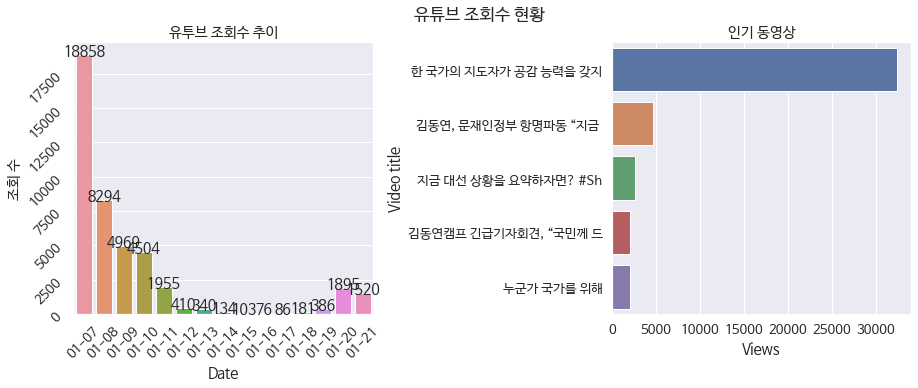

In [64]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("유튜브 조회수 현황")
plt.subplots_adjust(wspace=0.8)

# 유투브 조회수
sns.barplot(ax=axes[0] ,x="Date", y="조회 수", data=view_gr_sum)
axes[0].tick_params(labelrotation=45)
axes[0].set_title("유투브 조회수 추이")
for index, row in view_gr_sum.iterrows():
    axes[0].text(index, row['조회 수'], str(row['조회 수']), ha='center')
    
sns.barplot(ax=axes[1], x=title_gr_sum['Views'], y=title_gr_sum['Video title'])
axes[1].set_title("인기 동영상")
plt.savefig("../weekly_plots/{}/youtube_views.png".format(date_week), transparent=True)

## Datalab 

In [69]:
df_article.head()

,Unnamed: 0,title,originallink,link,description,pubDate
0,0,<b>김동연</b> &quot;이대론 나라 망해&quot;…李·尹에 위기 극복 연석...,http://yna.kr/AKR20220121070300001?did=1195m,https://news.naver.com/main/read.naver?mode=LS...,&quot;국민 삶과 직결된 문제에 정치적 계산 접어두고 조건 없이 만나자&quot...,2022-01-21
1,1,"<b>김동연</b>, 이재명·윤석열에 1대1·다자간 연석회의 제안",http://www.newsis.com/view/?id=NISX20220121_00...,https://news.naver.com/main/read.naver?mode=LS...,기사내용 요약&quot;이대로 가면 나라가 망한다&quot; &quot;정치적 계산...,2022-01-21
2,3,"<b>김동연</b>, 이재명·윤석열에 만남 제안 “이대로 가면 나라 망한다”",https://biz.chosun.com/policy/politics/electio...,https://news.naver.com/main/read.naver?mode=LS...,달라” <b>김동연</b> 새로운물결 대선 후보가 21일 이재명 더불어민주당 대선 ...,2022-01-21
3,4,"<b>김동연</b>, '챠챠챠' 페어 참석 &quot;청년에 기회 주는 사회 만들 ...",http://www.fnnews.com/news/202201211629327246,https://news.naver.com/main/read.naver?mode=LS...,<b>김동연</b> 새로운물결 대선 후보가 21일 서울 마포구에서 열린 사단법인 '...,2022-01-21
4,5,"<b>김동연</b>, 이재명·윤석열에 만남 제안… &quot;제대로 된 의제 만들자...",https://view.asiae.co.kr/article/2022012111342...,https://news.naver.com/main/read.naver?mode=LS...,<b>김동연</b> 새로운물결 대선후보가 이재명 더불어민주당 대선후보와 윤석열 국민...,2022-01-21


In [70]:
art_views = df_article[["title", "pubDate"]]

grs = art_views.groupby("pubDate")
art_follower = grs.count()
art_follower.reset_index(inplace=True)
art_follower.columns = ["Date", "Counts"]
art_follower['Date'] = art_follower['Date'].apply(lambda x : x.strftime("%m-%d"))


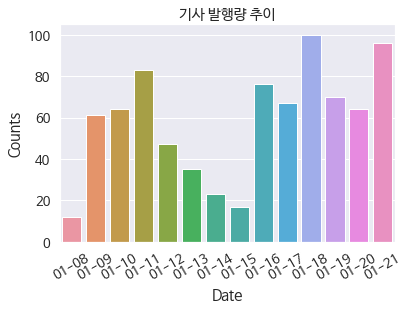

In [71]:
sns.barplot(x="Date", y="Counts", data=art_follower)
plt.xticks(rotation=30)
plt.title("기사 발행량 추이")
plt.savefig("../weekly_plots/{}/article_transparent.png".format(date_week), transparent=True)

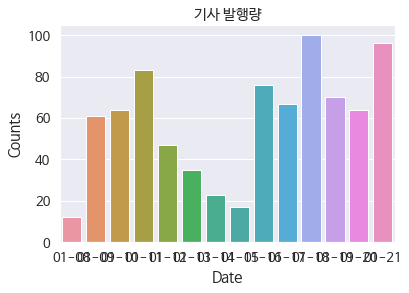

In [72]:
# fig, axes = plt.subplots(1,3, figsize=(15,5))
# fig.suptitle("기사 발행량 현황")
# plt.subplots_adjust()


    
# 유투브 조회수
sns.barplot(x="Date", y="Counts", data=art_follower)
# for index, row in art_follower.iterrows():
#     plt.text(index, row['Counts'], str(row['Counts']), ha='center')
plt.title("기사 발행량")
plt.savefig("../weekly_plots/{}/articles.png".format(date_week), transperent=True)
# ## Temp
# sns.barplot(ax=axes[1], x=title_gr_sum['Views'], y=title_gr_sum['Video title'])
# axes[1].set_title("인기 동영상")
# plt.savefig("../weekly_plots/2021-10-18/youtube_views.png")


/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


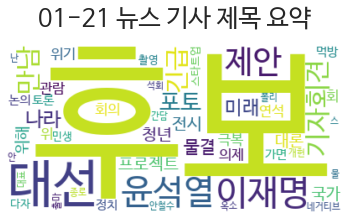

In [73]:
# WordCloud Previous and now
t = Twitter()

grp_keys = list(grs.groups.keys())

wcs = {}
for idx, k in enumerate(grp_keys):
    font_path = "./NanumBarunGothic.ttf"
    df_g = grs.get_group(k)
    title_txt = df_g.title.to_string()
    tokens = t.nouns(title_txt)
    ko = nltk.Text(tokens, name="뉴스 기사")
    data = ko.vocab().most_common(50)
    data = data[1:] # 김동연 제외
    wc = WordCloud(font_path=font_path, 
                   background_color="white", max_words=1000,max_font_size=300).generate_from_frequencies(dict(data))

    
    plt.title(k.strftime("%m-%d") + " 뉴스 기사 제목 요약", fontsize=25, pad=20)
    plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    wcs[idx] = wc
    #wc.to_file('../weekly_plots/2021-10-18/wc_{}_{}_week{}.png'.format(k.month, k.day, k.isocalendar()[1]))
    plt.savefig('../weekly_plots/{}/wc_{}_{}_week{}.png'.format(date_week, k.month, k.day, k.isocalendar()[1]), 
               transparent=True)

## Datalab

In [46]:
df_datalab = pd.read_csv("../sns_data/{}/datalab/datalab.csv".format(date_week))
df_datalab= df_datalab.iloc[6:]
df_datalab.columns = ["Date", "검색량"]
df_datalab['Date'] = pd.to_datetime(df_datalab['Date'])

df_datalab['Date'] = df_datalab['Date'].map(lambda x : x.strftime("%m-%d"))
df_datalab["검색량"]= df_datalab['검색량'].map(lambda x : float(x))

In [47]:

df_datalab.iloc[6:]

,Date,검색량
12,11-23,66.60359


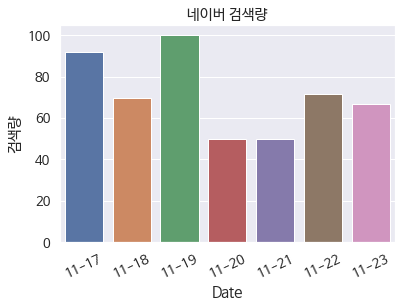

In [48]:

# 유투브 조회수
sns.barplot(x="Date", y="검색량", data=df_datalab)
plt.title("네이버 검색량")
plt.xticks(rotation=25)
plt.savefig("../weekly_plots/{}/datalab_search.png".format(date_week), transparent=True, dpi=100)